In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import datetime
os.getcwd()
# os.chdir("/nfs/a319/gy17m2a/PhD/Scripts/CatchmentAnalysis/CreateSyntheticRainfallEvents/RobertoProfiles")

'Z:\\nfs_folder\\PhD\\Scripts\\CatchmentAnalysis\\CreateSyntheticRainfallEvents\\RobertoProfiles'

### Define total event rainfall for 6h duration, 100 year return period event in Lin Dyke

In [4]:
total_event_rainfall = 59.98

In [171]:
# Read in profiles
profiles = pd.read_csv("kmeans_15clustersPerDur.csv")
# Just keep prain
profiles = profiles[profiles['Variable'] == 'prain']

### Get rainfall depth in each time step

In [319]:
def find_rainfall_depth_each_min(cluster_number, duration_bin):
    
    profiles_this_dur_bin = profiles[profiles['Duration'] ==duration_bin]
    # Get just for cluster one
    one_cluster = profiles_this_dur_bin[profiles_this_dur_bin['Cluster'] ==cluster_number]
    # Put into correct order
    one_cluster = one_cluster.sort_values(by=['Dur_bins'])
    # Remove the initial 0 value
    one_cluster = one_cluster[1:-1]
    # Reset index
    one_cluster.reset_index(inplace=True, drop=True)
    # Find the actual rainfall in each timestep, by multiplying by the total event rainfall for Lin Dyke
    one_cluster['rainfall_this_dur_bin'] = one_cluster['Mean'] * total_event_rainfall
    # Add a column with the cumulative totals
    one_cluster['cumulative_rainfall_this_dur_bin'] =  one_cluster['rainfall_this_dur_bin'].cumsum()
    
    # Set the value for each of the original timesteps as one 30th of the original value
    one_cluster['rainfall_depth_this_min'] = one_cluster['rainfall_this_dur_bin']/30
    # Then repeat this 30 times (so the value which was originally over 30 minutes, is now split equally 1/30th in each minute)
    one_cluster.reset_index(inplace=True, drop = True)
    one_cluster= one_cluster.loc[one_cluster.index.repeat(30)].reset_index(drop=True)
    
    # Drop unneeded columns
    one_cluster = one_cluster.drop(["Cluster", "Dur_bins", "Variable", "Duration", "Profile_shape", "Cluster_id", "Mean"], axis =1)
    
    # Add a starting and ending 0 value
    new_row = pd.DataFrame(dict(zip(one_cluster.columns.values, [0,0,0])), index = [0])
    one_cluster = pd.concat([new_row,one_cluster.loc[:],new_row]).reset_index(drop=True)
    
    # Add a new minutes column
    one_cluster.insert(0, 'minute', range(1,len(one_cluster)+1))
    
    # Add a column with the cumulative totals
    one_cluster['cumulative_rainfall_this_min'] =  one_cluster['rainfall_depth_this_min'].cumsum()

    # Keep just minute-ly values
    one_cluster = one_cluster.drop(['rainfall_this_dur_bin', 'cumulative_rainfall_this_dur_bin'],axis=1) 
    
    return one_cluster


def plot_rainfall_depth_each_min(cluster, variable):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(12,6))
    #fig.suptitle('Horizontally stacked subplots')
    ax1.plot(cluster1['minute'], cluster1['rainfall_depth_this_min'])
    ax1.set_xlabel("minute")
    ax1.set_ylabel("Rainfall depth (mm)")
    ax1.title.set_text("Rainfall depth (mm)")
    
    ax2.plot(cluster1['minute'], cluster1['cumulative_rainfall_this_min'])
    ax2.set_ylabel("cumulative rainfall depth (mm)")
    ax2.set_xlabel("minutes")
    ax2.title.set_text("Cumulative rainfall depth (mm)")

### Add the rainfall depth at each minute 
Equally divide the rainfall depth over 30 minutes into 1 minute intervals 

In [317]:
cluster1 = find_rainfall_depth_each_min(1,'[2:10 - 6:45) hr' )

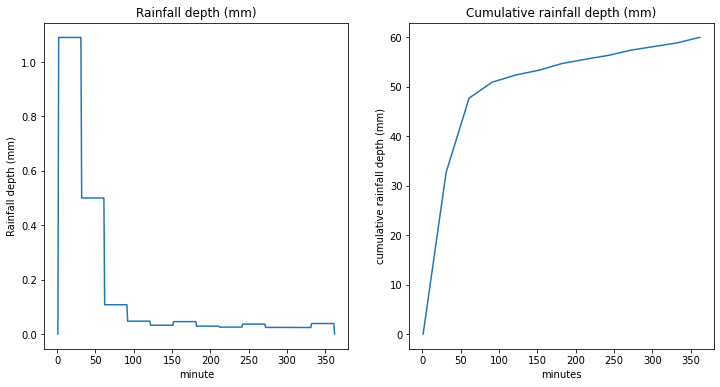

In [320]:
plot_rainfall_depth_each_min(cluster1, "cumulative")

In [323]:
for cluster_number in range(1,16):
    cluster = find_rainfall_depth_each_min(cluster_number,"[2:10 - 6:45) hr" )
    cluster.to_csv("LinDykeProfiles/6hr_100yrRP/cluster{}.csv".format(cluster_number), index = False)

In [206]:
# # Create list to store the values for each interpolated minute
# all_minutes_values = []
# # 
# # Get the minute which each of the duration bisn refers to (is this sensical to assume these relate to a specific minutes?)
# minutes = cluster['Dur_bins'] * 360

# # Find the interpolated values?
# y_interp = interp1d(minutes,cluster['rainfall_this_dur_bin'])

# # Find the interpolated values corresponding to each minute
# for i in range(0,360):
#     all_minutes_values.append(y_interp(i))

# # Save as dataframe
# df = pd.DataFrame({'minute':range(0,360),
#                    'values':all_minutes_values})


# # plt.plot(df['minute'], df['values'], linestyle = 'solid')
# plt.plot(cluster['Dur_bins'], cluster['rainfall_this_dur_bin'], linestyle = 'solid')